Esnayders Alonso Bolaños Medina

---



Importamos la data que usaremos y visualicemos que contiene la data




In [ ]:
import pandas as pd
df = pd.read_csv('//content/Option_B_clustering - Option_B_clustering.csv')
print(df)

       gender  highest_education  imd_band  age_band  num_of_prev_attempts  \
0           1                  2         9         2                     0   
1           0                  2         2         1                     0   
2           0                  3         5         1                     0   
3           0                  1         5         0                     0   
4           1                  2         3         0                     0   
...       ...                ...       ...       ...                   ...   
12732       0                  1         8         0                     0   
12733       0                  3         8         0                     0   
12734       0                  1         4         1                     0   
12735       0                  3         2         0                     0   
12736       0                  2         5         1                     0   

       studied_credits  disability  passed_course  assess_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head(5)

,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,passed_course,assess_score_1,assess_score_2,assess_score_3,assess_score_4,assess_score_5
0,1,2,9,2,0,240,0,1,78,85,80,85,82
1,0,2,2,1,0,60,0,1,70,68,70,64,60
2,0,3,5,1,0,60,0,1,72,71,74,88,75
3,0,1,5,0,0,60,0,1,69,30,63,35,75
4,1,2,3,0,0,60,0,1,70,65,62,75,68


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12737 entries, 0 to 12736
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   gender                12737 non-null  int64
 1   highest_education     12737 non-null  int64
 2   imd_band              12737 non-null  int64
 3   age_band              12737 non-null  int64
 4   num_of_prev_attempts  12737 non-null  int64
 5   studied_credits       12737 non-null  int64
 6   disability            12737 non-null  int64
 7   passed_course         12737 non-null  int64
 8   assess_score_1        12737 non-null  int64
 9   assess_score_2        12737 non-null  int64
 10  assess_score_3        12737 non-null  int64
 11  assess_score_4        12737 non-null  int64
 12  assess_score_5        12737 non-null  int64
dtypes: int64(13)
memory usage: 1.3 MB


In [ ]:
df.describe()

,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,passed_course,assess_score_1,assess_score_2,assess_score_3,assess_score_4,assess_score_5
count,12737.000000,12737.000000,12737.000000,12737.000000,12737.000000,12737.000000,12737.000000,12737.000000,12737.000000,12737.000000,12737.000000,12737.000000,12737.000000
mean,0.446651,2.089896,4.407788,0.339169,0.107404,74.758577,0.091858,0.763131,73.988773,74.916935,79.734474,75.672686,78.116589
std,0.497165,0.940941,2.806466,0.488947,0.389791,37.461960,0.288837,0.425178,19.162201,14.650798,17.650248,17.969746,19.530364
min,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,2.000000,0.000000,0.000000,60.000000,0.000000,1.000000,66.000000,66.000000,69.000000,65.000000,67.000000
50%,0.000000,2.000000,4.000000,0.000000,0.000000,60.000000,0.000000,1.000000,77.000000,76.000000,81.000000,79.000000,80.000000
75%,1.000000,3.000000,7.000000,1.000000,0.000000,90.000000,0.000000,1.000000,86.000000,86.000000,95.000000,89.000000,96.000000
max,1.000000,4.000000,9.000000,2.000000,6.000000,630.000000,1.000000,1.000000,100.000000,100.000000,100.000000,100.000000,100.000000


Vemos que nuestra data no tenga nulos

In [ ]:
df.isnull().sum()

gender                  0
highest_education       0
imd_band                0
age_band                0
num_of_prev_attempts    0
studied_credits         0
disability              0
passed_course           0
assess_score_1          0
assess_score_2          0
assess_score_3          0
assess_score_4          0
assess_score_5          0
dtype: int64

Ajuste y transformacion de datos, preparando para el modelo

Teniendo en cuenta que KMeans es sensible a la escala de los datos, procederemos con la estandarización mediante StandardScaler. Eliminaremos la columna de "passed_course" asumiendo que es la predicción si pasó o no el curso.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)
df = df.drop(['passed_course'], axis=1)
df.head(10)

,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,assess_score_1,assess_score_2,assess_score_3,assess_score_4,assess_score_5
0,1,2,9,2,0,240,0,78,85,80,85,82
1,0,2,2,1,0,60,0,70,68,70,64,60
2,0,3,5,1,0,60,0,72,71,74,88,75
3,0,1,5,0,0,60,0,69,30,63,35,75
4,1,2,3,0,0,60,0,70,65,62,75,68
5,0,3,9,0,0,120,0,72,72,72,73,73
6,1,1,7,1,0,60,0,68,76,78,80,68
7,0,2,5,0,0,60,0,73,85,75,70,77
8,0,3,6,1,0,60,0,59,60,60,61,38
9,1,3,3,1,0,60,0,67,66,67,65,65


Verificamos los valores de las columnas y vemos que las columnas: 'gender', 'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts', 'disability' y 'passed_course' se encuentran escalados.

Mientras que las columnas 'studied_credits', 'assess_score_1', 'assess_score_2', 'assess_score_3','assess_score_4' y 'assess_score_5' tienen valores en un rango aun mayor.

In [ ]:
df.loc[:,:].hist(figsize=(16,12),
                 xlabelsize='10',
                 ylabelsize='10');

In [ ]:
df.describe()

,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,passed_course,assess_score_1,assess_score_2,assess_score_3,assess_score_4,assess_score_5
count,12737.000000,12737.000000,12737.000000,12737.000000,12737.000000,12737.000000,12737.000000,12737.000000,12737.000000,12737.000000,12737.000000,12737.000000,12737.000000
mean,0.446651,2.089896,4.407788,0.339169,0.107404,74.758577,0.091858,0.763131,73.988773,74.916935,79.734474,75.672686,78.116589
std,0.497165,0.940941,2.806466,0.488947,0.389791,37.461960,0.288837,0.425178,19.162201,14.650798,17.650248,17.969746,19.530364
min,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,2.000000,0.000000,0.000000,60.000000,0.000000,1.000000,66.000000,66.000000,69.000000,65.000000,67.000000
50%,0.000000,2.000000,4.000000,0.000000,0.000000,60.000000,0.000000,1.000000,77.000000,76.000000,81.000000,79.000000,80.000000
75%,1.000000,3.000000,7.000000,1.000000,0.000000,90.000000,0.000000,1.000000,86.000000,86.000000,95.000000,89.000000,96.000000
max,1.000000,4.000000,9.000000,2.000000,6.000000,630.000000,1.000000,1.000000,100.000000,100.000000,100.000000,100.000000,100.000000


Con los graficos podemos visualizar la predominancia de cada variable

Hay una leve diferencia en el genero del grupo evaluado, la diferencia en algunas variables es mas notoria, pero el no tener los valores a los que corresponden, nos facilita evitar sesgos.

Aqui comenzaremos a aplicar kmeans

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Iniciamos listas para almacenar error cuadratico y puntuaciones de silueta
wcss = []
silhouette_scores = []


for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    cluster_labels = kmeans.fit_predict(data_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f'Para n_clusters = {i}, la puntuación de silueta es: {silhouette_avg:.4f}')


fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Grafico Método del Codo
axs[0].plot(range(2, 11), wcss, marker='o', linestyle='--')
axs[0].set_title('Método del Codo para K')
axs[0].set_xlabel('Número de clusters')
axs[0].set_ylabel('Suma de errores cuadraticos')
axs[0].set_xticks(np.arange(2, 11, step=1))
axs[0].grid(True)

# Grafico puntuación
axs[1].plot(range(2, 11), silhouette_scores, marker='o', linestyle='--', color='orange')
axs[1].set_title('Puntuación de Silueta para cada K')
axs[1].set_xlabel('Número de clusters')
axs[1].set_ylabel('Puntuación de Silueta')
axs[1].set_xticks(np.arange(2, 11, step=1))
axs[1].grid(True)

# Mostrar las gráficas
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para n_clusters = 2, la puntuación de silueta es: 0.1718


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para n_clusters = 3, la puntuación de silueta es: 0.0948


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para n_clusters = 4, la puntuación de silueta es: 0.1075


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para n_clusters = 5, la puntuación de silueta es: 0.1125


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para n_clusters = 6, la puntuación de silueta es: 0.1062


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para n_clusters = 7, la puntuación de silueta es: 0.1029


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para n_clusters = 8, la puntuación de silueta es: 0.1046


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


METODO DEL CODO PARA K

El gráfico del codo es útil para determinar el número óptimo de clústeres en el algoritmo k-means. El fin es identificar el punto en el gráfico donde la curva forma un codo; esto se entiende que despues de este punto, tener clústeres no tendrá significancia para el modelo.

En el gráfico levemente visualizamos que hay un codo a partir del grupo 5. Por ello, según el gráfico de Codo, el número optimo de clusteres es 5.

PUNTUACION DE SILUETA PARA CADA K

El gráfico de Silhouette, nos ayuda de la misma forma que la de codo, para este caso se debe identificar el punto más alto, que sería 2, ya que a partir de 2 empieza a decaer.

ESCOGIENDO CLUSTER NUMERO 5

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd


kmeans = KMeans(n_clusters=5, random_state=42)

# Ajustar el modelo a los datos
kmeans.fit(data_scaled)

# Asignando cada punto a un cluster
clusters = kmeans.predict(data_scaled)

# Agregando la columna de clusters al DataFrame original
df_with_clusters = pd.concat([df, pd.DataFrame({'Cluster': clusters})], axis=1)

# Mostramos los primeros registros del DataFrame con los clusters asignados
df_with_clusters.head()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,assess_score_1,assess_score_2,assess_score_3,assess_score_4,assess_score_5,Cluster
0,1,2,9,2,0,240,0,78,85,80,85,82,4
1,0,2,2,1,0,60,0,70,68,70,64,60,0
2,0,3,5,1,0,60,0,72,71,74,88,75,0
3,0,1,5,0,0,60,0,69,30,63,35,75,2
4,1,2,3,0,0,60,0,70,65,62,75,68,4


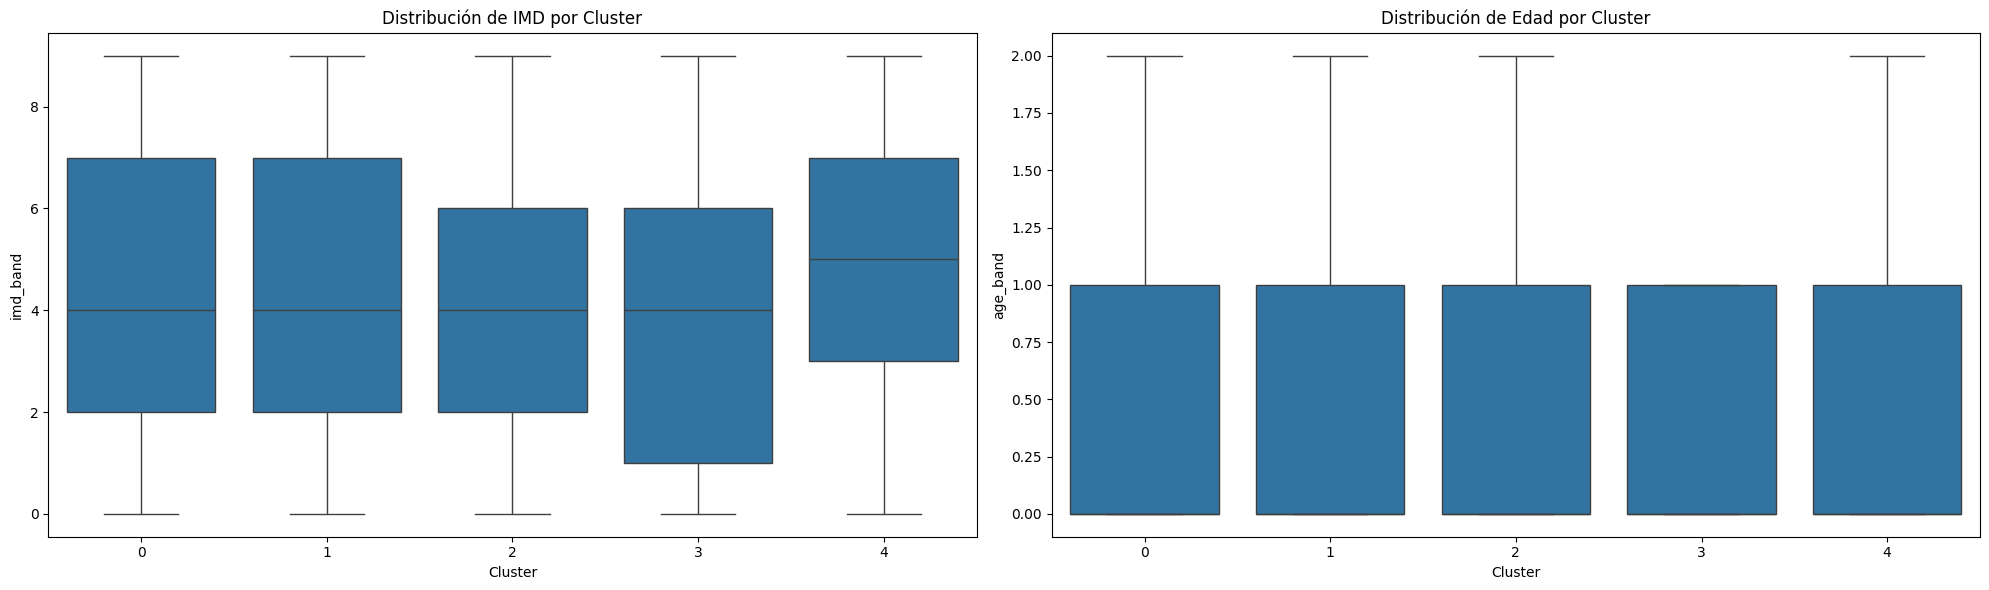

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una figura con dos subgráficos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Visualización 1: Distribución de imd_band por cluster
sns.boxplot(ax=axes[0], x='Cluster', y='imd_band', data=df_with_clusters)
axes[0].set_title('Distribución de IMD por Cluster')

# Visualización 2: Distribución de otra variable importante (ejemplo: edad)
sns.boxplot(ax=axes[1], x='Cluster', y='age_band', data=df_with_clusters)
axes[1].set_title('Distribución de Edad por Cluster')

# Mostrar la figura con ambos gráficos
plt.tight_layout()
plt.show()


# DISTRIBUCION DE IMD POR CLUSTER

VEMOS QUE:

Todos los grupos tienen una mediana de "imd_band" muy similar, alrededor de 4, excepto el grupo 4 que tiene una mediana de 5.

El grupo 2 tiene una caja más estrecha, lo que significa que sus valores están más concentrados y hay menos variabilidad en comparación con los otros grupos.

Los rangos de los valores de "imd_band" son similares para todos los grupos, yendo aproximadamente de 0 a 8.

# DISTRIBUCION DE EDAD POR CLUSTER
VEMOS QUE:

Todos los clusters tienen una mediana similar para la variable "Edad", lo que sugiere que no hay mucha diferencia en la edad promedio de los estudiantes entre los diferentes clusters.

La longitud de las cajas y los bigotes es bastante similar en todos los clusters, lo que indica que la distribución de edades es bastante uniforme entre los grupos.



# PARTE 2

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from google.colab import drive
drive.mount('/content/drive')
filename2  = "/content/drive/MyDrive/Option_B_modeling.csv"
df2        = pd.read_csv(filename2)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df2.head(10)

,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,passed_course,assess_score_1,assess_score_2,...,module_CCC,module_DDD,module_EEE,module_FFF,module_GGG,presentation_0,presentation_2013B,presentation_2013J,presentation_2014B,presentation_2014J
0,1,2,9,2,0,240,0,1,78.0,85.0,...,0,0,0,0,0,0,0,1,0,0
1,0,2,2,1,0,60,0,1,70.0,68.0,...,0,0,0,0,0,0,0,1,0,0
2,0,3,5,1,0,60,0,1,72.0,71.0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,5,0,0,60,0,1,69.0,30.0,...,0,0,0,0,0,0,0,1,0,0
4,1,2,3,0,0,60,0,1,70.0,65.0,...,0,0,0,0,0,0,0,1,0,0
5,0,3,9,0,0,120,0,1,72.0,72.0,...,0,0,0,0,0,0,0,1,0,0
6,1,1,7,1,0,60,0,1,68.0,76.0,...,0,0,0,0,0,0,0,1,0,0
7,0,2,5,0,0,60,0,1,73.0,85.0,...,0,0,0,0,0,0,0,1,0,0
8,0,3,6,1,0,60,0,1,59.0,60.0,...,0,0,0,0,0,0,0,1,0,0
9,1,3,3,1,0,60,0,1,67.0,66.0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12737 entries, 0 to 12736
Columns: 931 entries, gender to presentation_2014J
dtypes: float64(910), int64(21)
memory usage: 90.5 MB


VEMOS QUE NO TENGAMOS NULOS PRESENTES EN LA DATA

In [ ]:
for columns in df2:
  if df2[columns].isna().sum() != 0:
    print('Existen', df2[columns].isna().sum(),"valores NAN en la columna", columns)

In [ ]:
X = df2.drop('passed_course', axis=1)
y = df2['passed_course']

ELIMINAMOS DUPLICADOS

In [ ]:
df2.drop_duplicates(inplace=True)

DIVIDIMOS DATOS

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

APLICAMOS PCA

In [ ]:
scaler2 = StandardScaler()
X_train_scaled = scaler2.fit_transform(X_train)
X_test_scaled = scaler2.transform(X_test)

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Número de características antes de PCA:", X_train_scaled.shape[1])
print("Número de características después de PCA:", X_train_pca.shape[1])

Número de características antes de PCA: 930
Número de características después de PCA: 485


VEMOS QUE MEDIANTE EL PCA HEMOS PODIDO REDUCIR DE 930 COLUMNAS A 485 COLUMNAS, MANTENIENDO LA INFORMACION DE 95%

# MODELAMOS LA DATA

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model1 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_pca.shape[1],)),
    Dense(1, activation='sigmoid')
])
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               62208     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 62337 (243.50 KB)
Trainable params: 62337 (243.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model2 = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_pca.shape[1],)),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               124416    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 157441 (615.00 KB)
Trainable params: 157441 (615.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.layers import Dropout

model3 = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_pca.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'AUC'])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               124416    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 157441 (615.00 KB)
Trainable params: 157441 (615.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


CORREMOS LOS TRES MODELOS VIENDO CUAL TIENE MEJOR DESEMPEÑO

In [ ]:
history1 = model1.fit(X_train_pca, y_train, epochs=50, validation_split=0.3)
history2 = model2.fit(X_train_pca, y_train, epochs=50, validation_split=0.3)
history3 = model3.fit(X_train_pca, y_train, epochs=50, validation_split=0.3)

Epoch 1/50
195/195 [==============================] - 2s 5ms/step - loss: 0.4353 - accuracy: 0.8280 - val_loss: 0.3962 - val_accuracy: 0.8490
Epoch 2/50
195/195 [==============================] - 1s 4ms/step - loss: 0.2685 - accuracy: 0.8899 - val_loss: 0.3965 - val_accuracy: 0.8527
Epoch 3/50
195/195 [==============================] - 1s 4ms/step - loss: 0.2131 - accuracy: 0.9181 - val_loss: 0.4031 - val_accuracy: 0.8520
Epoch 4/50
195/195 [==============================] - 1s 4ms/step - loss: 0.1727 - accuracy: 0.9380 - val_loss: 0.4113 - val_accuracy: 0.8579
Epoch 5/50
195/195 [==============================] - 1s 4ms/step - loss: 0.1387 - accuracy: 0.9510 - val_loss: 0.4401 - val_accuracy: 0.8520
Epoch 6/50
195/195 [==============================] - 1s 3ms/step - loss: 0.1104 - accuracy: 0.9644 - val_loss: 0.4595 - val_accuracy: 0.8583
Epoch 7/50
195/195 [==============================] - 1s 5ms/step - loss: 0.0858 - accuracy: 0.9744 - val_loss: 0.4759 - val_accuracy: 0.8568
Epoch 

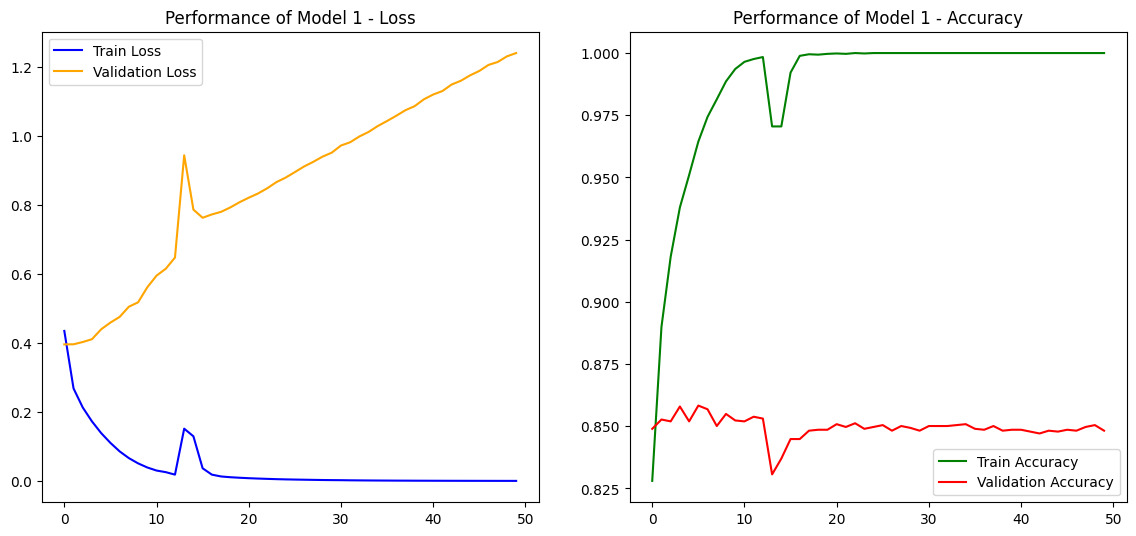

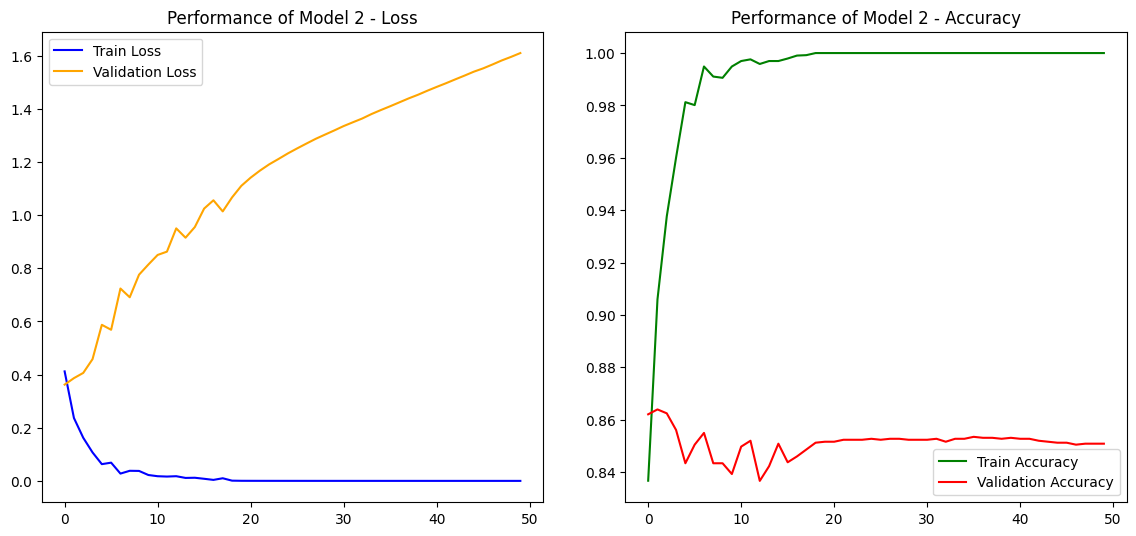

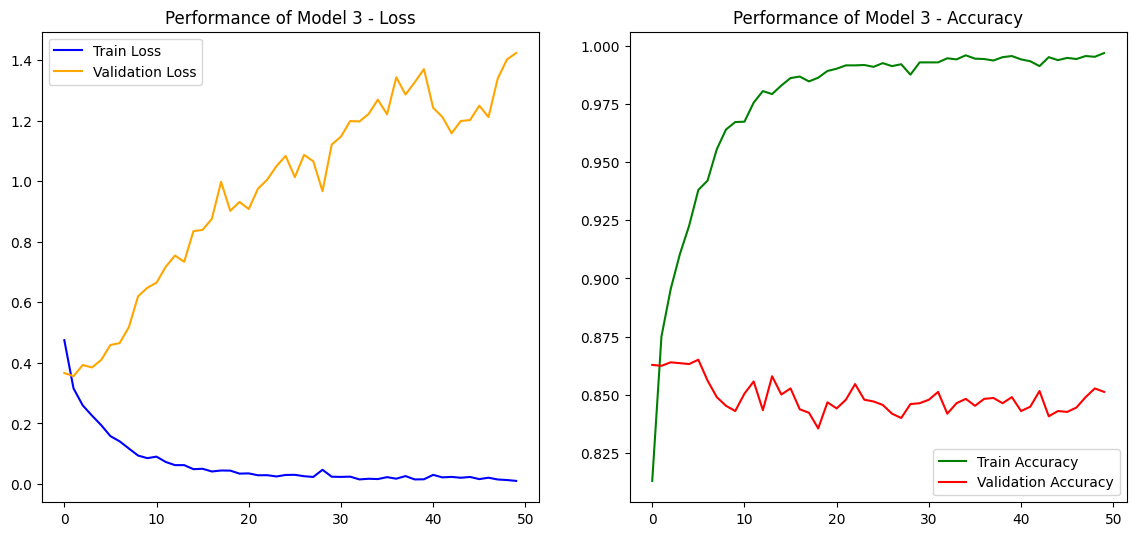

In [ ]:
def plot_history(history, title="Model Performance"):
    plt.figure(figsize=(12, 6))

    # Pérdida
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
    plt.title(f'{title} - Loss')
    plt.legend()

    # Precisión
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy', color='green')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
    plt.title(f'{title} - Accuracy')
    plt.legend()

    # Ajuste
    plt.tight_layout(pad=3.0)
    plt.show()

plot_history(history1, "Performance of Model 1")
plot_history(history2, "Performance of Model 2")
plot_history(history3, "Performance of Model 3")

# Modelo 1:

Gráficos de Pérdida (Loss): La pérdida de entrenamiento disminuye constantemente, indicando un buen aprendizaje. La pérdida de validación también disminuye, aunque puede ser a un ritmo más lento.

Gráficos de Precisión (Accuracy): La precisión de entrenamiento aumenta, lo cual es positivo. La precisión de validación también aumenta, pero se debe vigilar para evitar divergencias significativas de la precisión de entrenamiento.

Modelo 2:

Gráficos de Pérdida (Loss): La pérdida de entrenamiento disminuye, al igual que en el Modelo 1. La pérdida de validación debe disminuir también, pero la convergencia con la pérdida de entrenamiento es crucial.

Gráficos de Precisión (Accuracy): Se observa un aumento en la precisión de entrenamiento, indicando un buen aprendizaje. La precisión de validación debe seguir una tendencia similar, vigilando cualquier divergencia significativa.

Modelo 3:

Gráficos de Pérdida (Loss): La disminución en la pérdida de entrenamiento indica mejoría en el aprendizaje. La pérdida de validación también disminuye, sugiriendo una buena generalización.

Gráficos de Precisión (Accuracy): La precisión de entrenamiento aumenta continuamente, indicando buen ajuste a los datos. La precisión de validación debe mantenerse alta y cercana a la de entrenamiento.

conclsuion:

Comparación de Pérdidas: En todos los modelos, tanto las pérdidas de entrenamiento como las de validación disminuyen, lo cual es positivo. Se debe evitar que las pérdidas de validación diverjan significativamente de las de entrenamiento para prevenir sobreajuste.

Comparación de Precisión: La precisión de entrenamiento aumenta en los tres modelos. La precisión de validación debe seguir una tendencia similar. Cualquier estabilización o disminución en la precisión de validación podría indicar sobreajuste.

Conclusiones Generales: El Modelo 3 parece tener el mejor rendimiento general, con mejoras consistentes en ambas métricas, lo que sugiere una buena capacidad de generalización. Sin embargo, todos los modelos necesitan ser monitoreados para detectar signos de sobreajuste.

Estos análisis son cruciales para identificar el modelo más robusto y que mejor generalice a datos no vistos, lo cual es esencial para su desempeño en aplicaciones prácticas.